In [1]:
omex_fp = './fixtures/sbml-core/edelstein.omex'
omex_fp2 = './fixtures/sbml-core/Elowitz-Nature-2000-Repressilator.omex'
sbml_fp = './fixtures/sbml-core/BIOMD0000000001_url.xml'
sbml_fp2 = '/Users/alexanderpatrie/Desktop/repos/bio-compose/tests/fixtures/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml'
test_fp = '/Users/alexanderpatrie/Downloads/BorisEJB.xml'
sims = ['copasi', 'tellurium']
start = 0
stop = 1000
steps = 5

In [2]:
import bio_compose as bc 

result = bc.verify(test_fp, start, stop, steps)

> Status for job ending in 7269: SUBMITTED:PENDING 
> Status for job ending in 7269: COMPLETED 


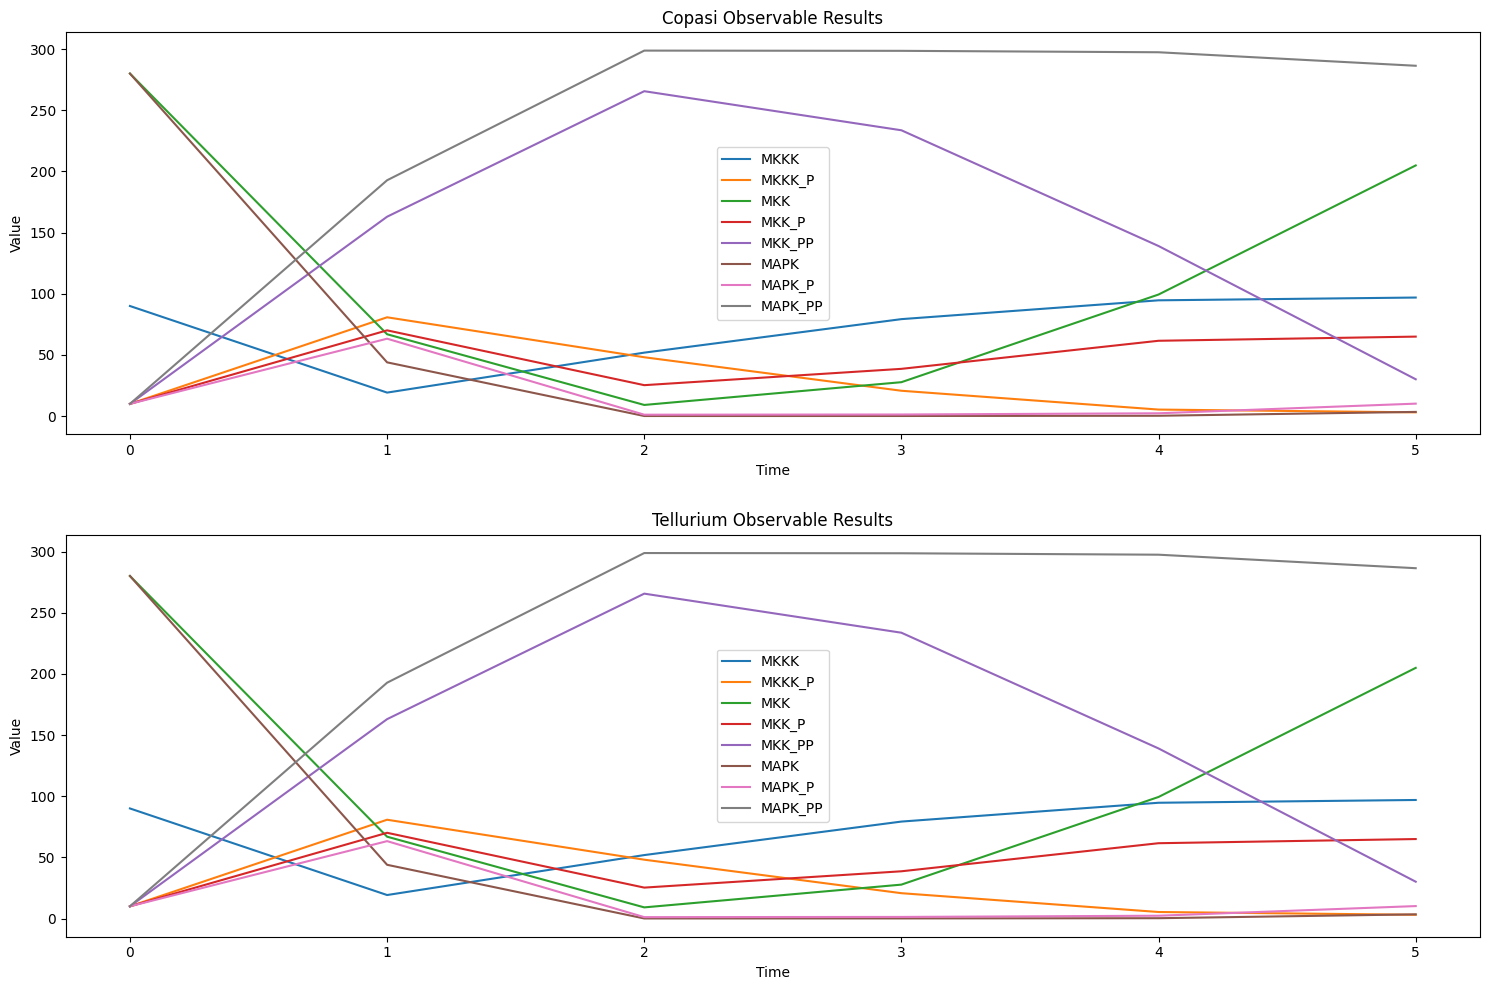

{'MKKK': {'copasi': [89.99999999999999,
   19.22409031386804,
   51.88225375232807,
   79.26940132150412,
   94.64959603810414,
   96.9163103099708],
  'tellurium': [90.0,
   19.224150303503833,
   51.88229151481973,
   79.26943006816741,
   94.64958175305141,
   96.91631085050118]},
 'MKKK_P': {'copasi': [9.999999999999998,
   80.77590968613191,
   48.11774624767178,
   20.730598678495717,
   5.350403961895676,
   3.0836896900289776],
  'tellurium': [10.0,
   80.77584969649612,
   48.1177084851802,
   20.73056993183251,
   5.35041824694851,
   3.083689149498818]},
 'MKK': {'copasi': [280.0,
   66.91544475325884,
   9.125774575582287,
   27.734104527951644,
   99.3861288696728,
   204.9002860762365],
  'tellurium': [280.0,
   66.9153784425283,
   9.125872715389205,
   27.734163662143434,
   99.3861180433712,
   204.90023614733417]},
 'MKK_P': {'copasi': [9.999999999999998,
   70.0977556594669,
   25.29790244373924,
   38.63209853740166,
   61.58386208417851,
   64.98096420661527],
  't

In [3]:
result.get_output_observables()

ACCEPTABLE SIMS: ['copasi', 'tellurium']


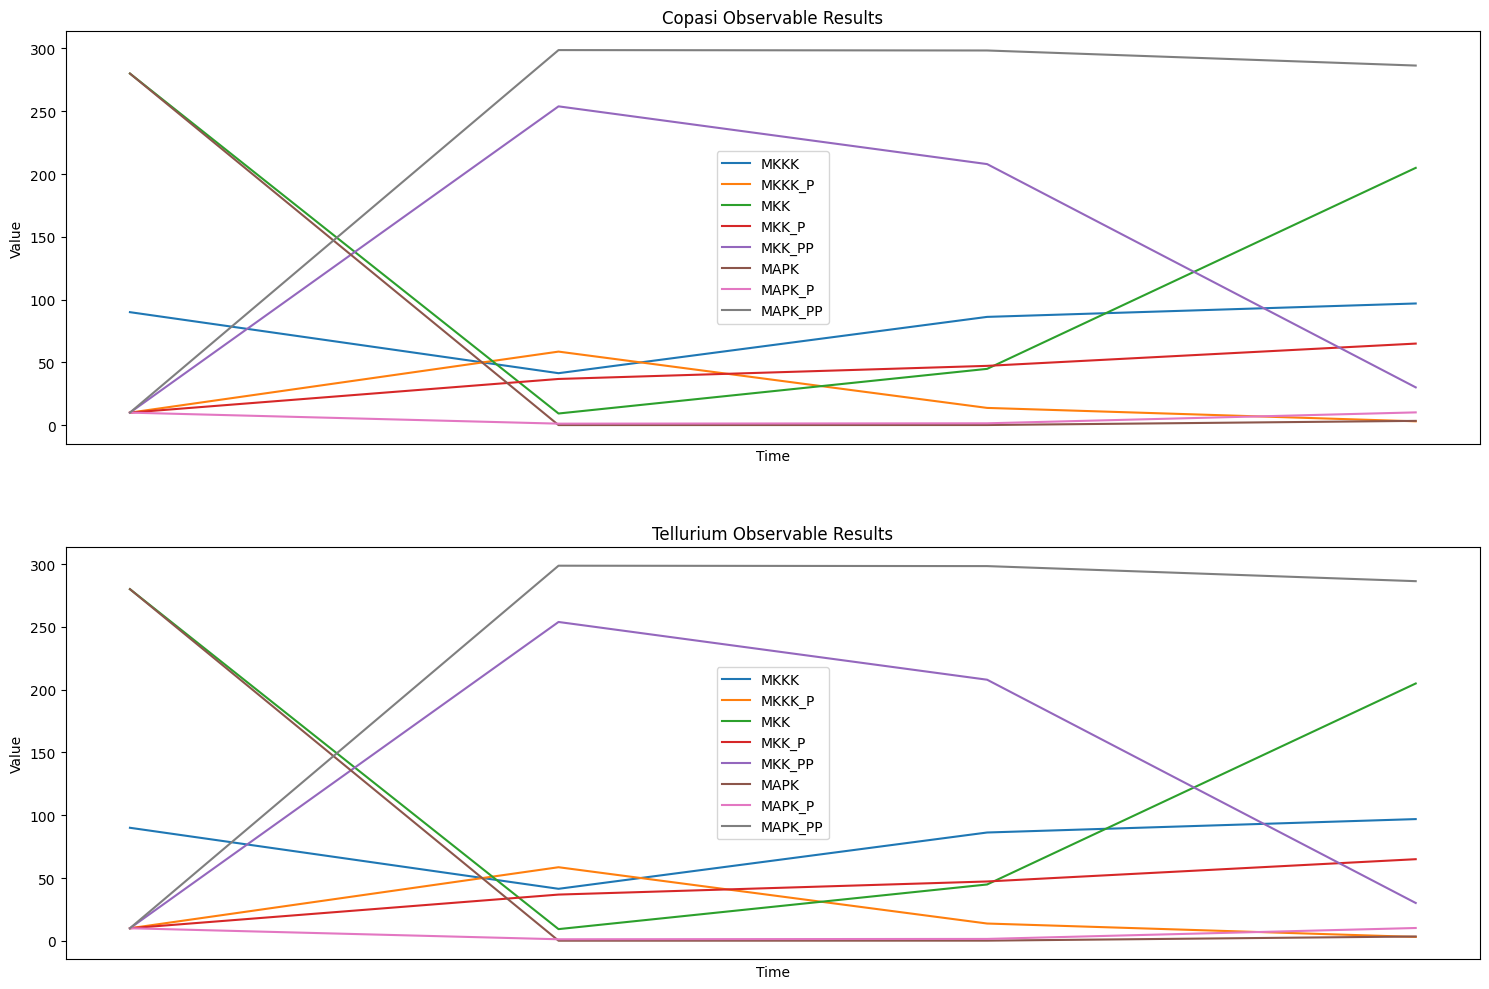

dict

In [1]:
import os 
import bio_compose as bc 
from bio_compose.verifier import Verifier


jobid = 'verification-utc_comparison_sbml-0ccbf7e4-505a-4af9-8bd8-5ef6f45e4b17'
o = bc.visualize_observables(jobid)
type(o)


In [4]:
r = v.get_output(verification1['job_id'])

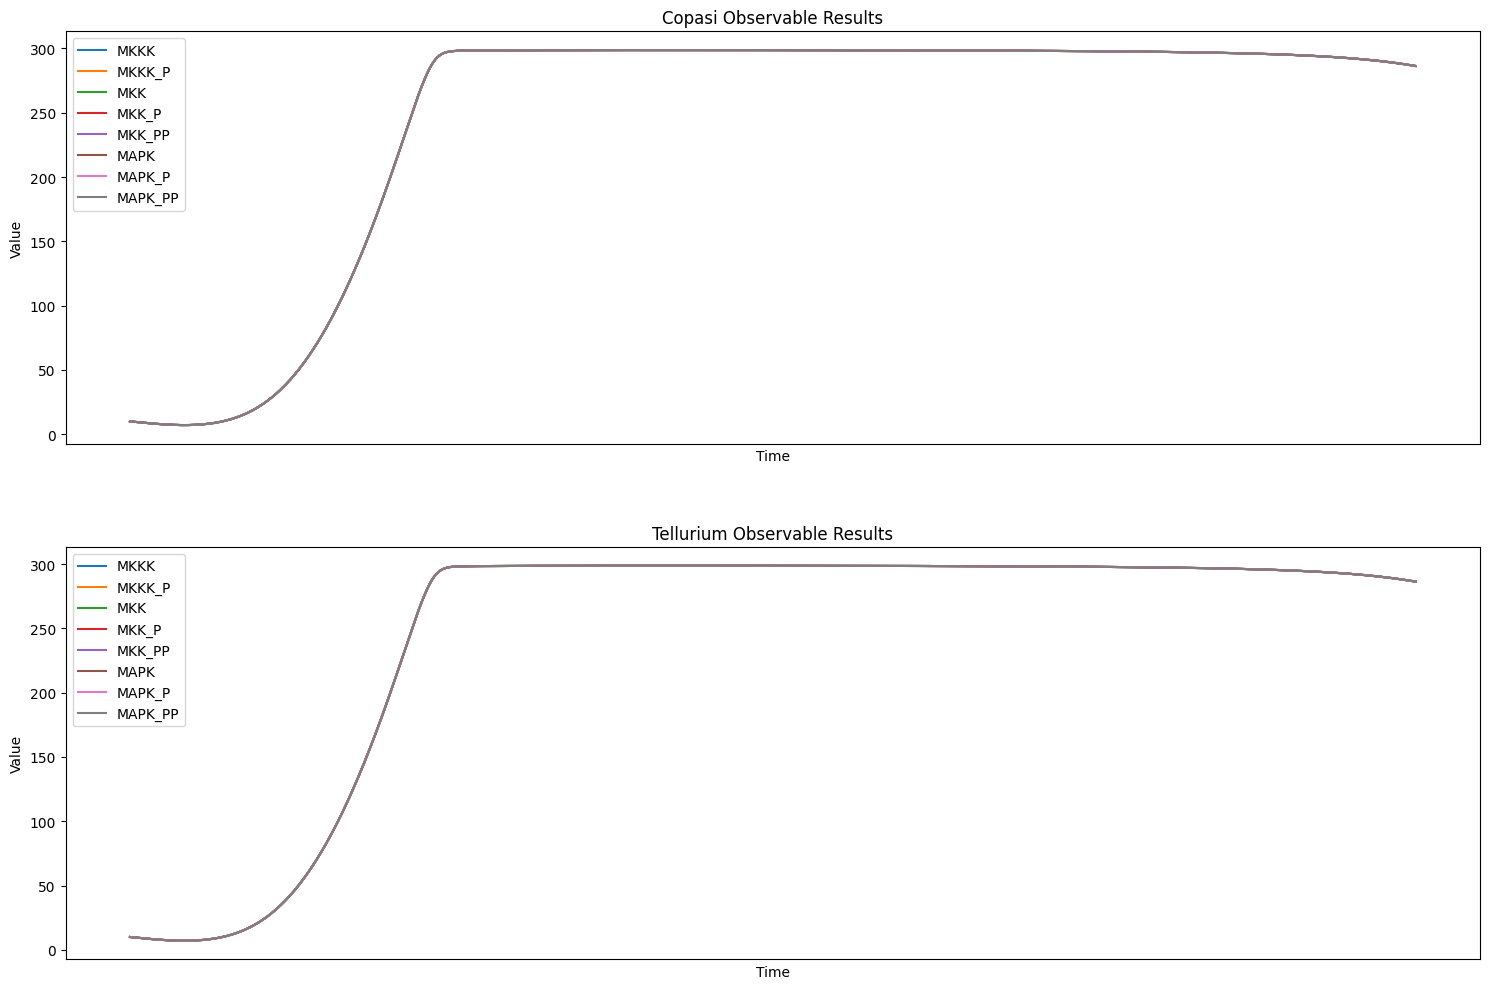

{'MKKK': {'copasi': [9.999999999999998,
   9.950004358422037,
   9.900023180460828,
   9.850065474216986,
   9.800140741197154,
   9.750258938791664,
   9.700430454792793,
   9.650666086858616,
   9.600977007589705,
   9.551374747526589,
   9.501871165824943,
   9.452478433095006,
   9.403209006015308,
   9.354075611452513,
   9.305091229189847,
   9.256269076445198,
   9.207622571401288,
   9.159165319156854,
   9.110911094693908,
   9.062873895410734,
   9.01506786072041,
   8.967507243952394,
   8.92020641097061,
   8.873179848317836,
   8.82644221680766,
   8.780008227256367,
   8.733892660929627,
   8.688110360313312,
   8.642676273364986,
   8.597605426685032,
   8.552912865452484,
   8.50861366975109,
   8.464722951578066,
   8.421255907494928,
   8.378227740625864,
   8.335653660797439,
   8.293548885522585,
   8.251928657046061,
   8.210808263004017,
   8.170202968080455,
   8.130128033214863,
   8.090598713441935,
   8.051630333106266,
   8.013238197987075,
   7.9754375727426

In [6]:
v.visualize_observables(job_id=verification1['job_id'])

In [3]:
from tqdm import tqdm

x = ['completed', 'in_progress', 'pending']
pbar = tqdm(x)

for char in pbar:
    from time import sleep 
    sleep(0.24)
    pbar.set_description("Processing %s" % char)

Processing pending: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]    


In [7]:
with tqdm(total=100) as pbar:
    for v in ['pending', 'in_progress', 'completed']:
        pbar.set_description("Processing %s" % v)
        sleep(1)
        if v == 'pending':
            pbar.update(25)
        elif v == 'in_progress':
            pbar.update(25)
        elif v == 'completed':
            pbar.update(50)

Processing completed: 100%|██████████| 100/100 [00:03<00:00, 33.10it/s] 


In [8]:
verification1

{'content': {'job_id': 'verification-bio_check-request-88e55a52-f1ae-4996-a1aa-da25843a04d1-81ad38d7-9237-4aef-9e2c-0fdbb365726b',
  'timestamp': '2024-09-23 18:41:29.634254',
  'status': 'COMPLETED',
  'results': {'MKKK': {'mse': {'copasi': {'copasi': 0.0,
      'tellurium': 1.4774207208240112e-09},
     'tellurium': {'copasi': 1.4774207208240112e-09, 'tellurium': 0.0}},
    'proximity': {'copasi': {'copasi': True, 'tellurium': True},
     'tellurium': {'copasi': True, 'tellurium': True}},
    'output_data': {'copasi': [9.999999999999998,
      9.950004358422037,
      9.900023180460828,
      9.850065474216986,
      9.800140741197154,
      9.750258938791664,
      9.700430454792794,
      9.650666086858617,
      9.600977007589707,
      9.55137474752659,
      9.501871165824944,
      9.452478433095008,
      9.40320900601531,
      9.354075611452515,
      9.30509122918985,
      9.2562690764452,
      9.20762257140129,
      9.159165319156855,
      9.11091109469391,
      9.062

In [ ]:
from tqdm import tqdm
import time


def run_progress(timeout, n_attempts, verifier, job_id):
# Setup the tqdm progress bar
    with tqdm(total=timeout, desc="Job Progress", unit="iteration") as pbar:
        while True:
            # quit after reaching timeout
            n_attempts += 1
            if n_attempts == timeout:
                pbar.set_description('Timeout reached. Please try to call the function again.')
                break
    
            # get result after buffering (submission) or refresh if re-iteration
            verification_result = verifier.get_output(job_id=job_id)
    
            # report job status
            current_status = verifier.get_output(job_id=job_id).get('content', {}).get('status', '')
            pbar.set_description(f'> Status for job ending in {get_job_signature(job_id)}: {current_status}')
    
            # Update tqdm progress bar
            pbar.update(1)
    
            # finish if job failed or completed, otherwise re-poll
            stop_conditions = ["COMPLETED", "FAILED"]
            job_finished = any([current_status.endswith(condition) for condition in stop_conditions])
            if not job_finished:
                time.sleep(poll_time)
            else:
                output = verifier.get_output(job_id=job_id)
                break

In [10]:
def visualize_observables(job_id: str, hspace: float = 0.25, use_grid: bool = False, save_dest: str = None):
        """
        Visualize simulation output (observables) data, not comparison data, with subplots for each species.

        Args:
            - **job_id**: `str`: job id for the simulation observable output you wish to visualize.
            - **hspace**: `float`: horizontal spacing between subplots. Defaults to 0.25.
            - **use_grid**: `bool`: whether to use a grid for each subplot. Defaults to False.
            - **save_dest**: `str`: path to save the figure. If this value is passed, the figure will be saved in pdf format to this location.

         Returns:
            `Tuple[matplotlib.Figure, Dict]` of matplotlib Figure and simulation observables indexed by simulator

        Raises:
            `IOError`: If `job_id` does not contain a 'results' field.
        """
        from bio_compose.verifier import Verifier
        import matplotlib.pyplot as plt
        self = Verifier()
        # grab output from job id
        output = self.get_output(job_id)

        # extract the list of simulators from the `output_data` for one observable
        species_data_content = output['content'].get('results')
        if species_data_content is None:
            raise IOError(f"The job for {job_id} is either not ready or has an error. Please check the output.")
        # excluded_observables = ['comparison_id', 'rmse', 'time', 'Time', 'data_generator_time', 'Time (dimensionless)']
        # observables = [key for key in species_data_content.keys() if key not in excluded_observables]
        # first_observable = species_data_content[observables[0]]
        # simulators = list(first_observable['output_data'].keys())
        # n_simulators = len(simulators)

        

        # create subplots
        fig, axes = plt.subplots(nrows=n_simulators, ncols=1, figsize=(15, 5 * n_simulators))

        # if only one simulator, `axes` won't be an array, so make it an array
        if n_simulators == 1:
            axes = [axes]

        obs = {observable: {} for observable in observables}
        # iterate over simulators and plot each observable (by iterating over observables)
        for idx, simulator in enumerate(simulators):
            ax = axes[idx]
            for observable in observables:
                value_data = species_data_content[observable]['output_data'][simulator]
                obs[observable][simulator] = value_data
                sns.lineplot(data=value_data, ax=ax, label=observable)

            sim = simulator.replace(simulator[0], simulator[0].upper())
            ax.set_title(f"{sim} Observable Results")
            ax.set_xlabel("Time")
            ax.set_ylabel("Value")
            ax.grid(use_grid)

            # hide the x-axis tick labels
            ax.set_xticks([])

        # adjust layout for better spacing
        plt.tight_layout()
        plt.subplots_adjust(hspace=hspace)
        plt.show()

        return fig, obs


f, o = visualize_observables(job_id=verification1['content']['job_id'])


NameError: name 'n_simulators' is not defined

In [5]:
for spec_name, spec_data in verification1['content']['results'].items():
    print(spec_name, spec_data['mse'])

MKKK {'copasi': {'copasi': 0.0, 'tellurium': 1.4774207208240112e-09}, 'tellurium': {'copasi': 1.4774207208240112e-09, 'tellurium': 0.0}}
MKKK_P {'copasi': {'copasi': 0.0, 'tellurium': 1.4774207202267868e-09}, 'tellurium': {'copasi': 1.4774207202267868e-09, 'tellurium': 0.0}}
MKK {'copasi': {'copasi': 0.0, 'tellurium': 1.4205424714481324e-08}, 'tellurium': {'copasi': 1.4205424714481324e-08, 'tellurium': 0.0}}
MKK_P {'copasi': {'copasi': 0.0, 'tellurium': 1.4493492055999599e-08}, 'tellurium': {'copasi': 1.4493492055999599e-08, 'tellurium': 0.0}}
MKK_PP {'copasi': {'copasi': 0.0, 'tellurium': 4.37582994476422e-08}, 'tellurium': {'copasi': 4.37582994476422e-08, 'tellurium': 0.0}}
MAPK {'copasi': {'copasi': 0.0, 'tellurium': 5.574959393816073e-08}, 'tellurium': {'copasi': 5.574959393816073e-08, 'tellurium': 0.0}}
MAPK_P {'copasi': {'copasi': 0.0, 'tellurium': 3.516613834086371e-08}, 'tellurium': {'copasi': 3.516613834086371e-08, 'tellurium': 0.0}}
MAPK_PP {'copasi': {'copasi': 0.0, 'telluri

KeyError: 'mse'

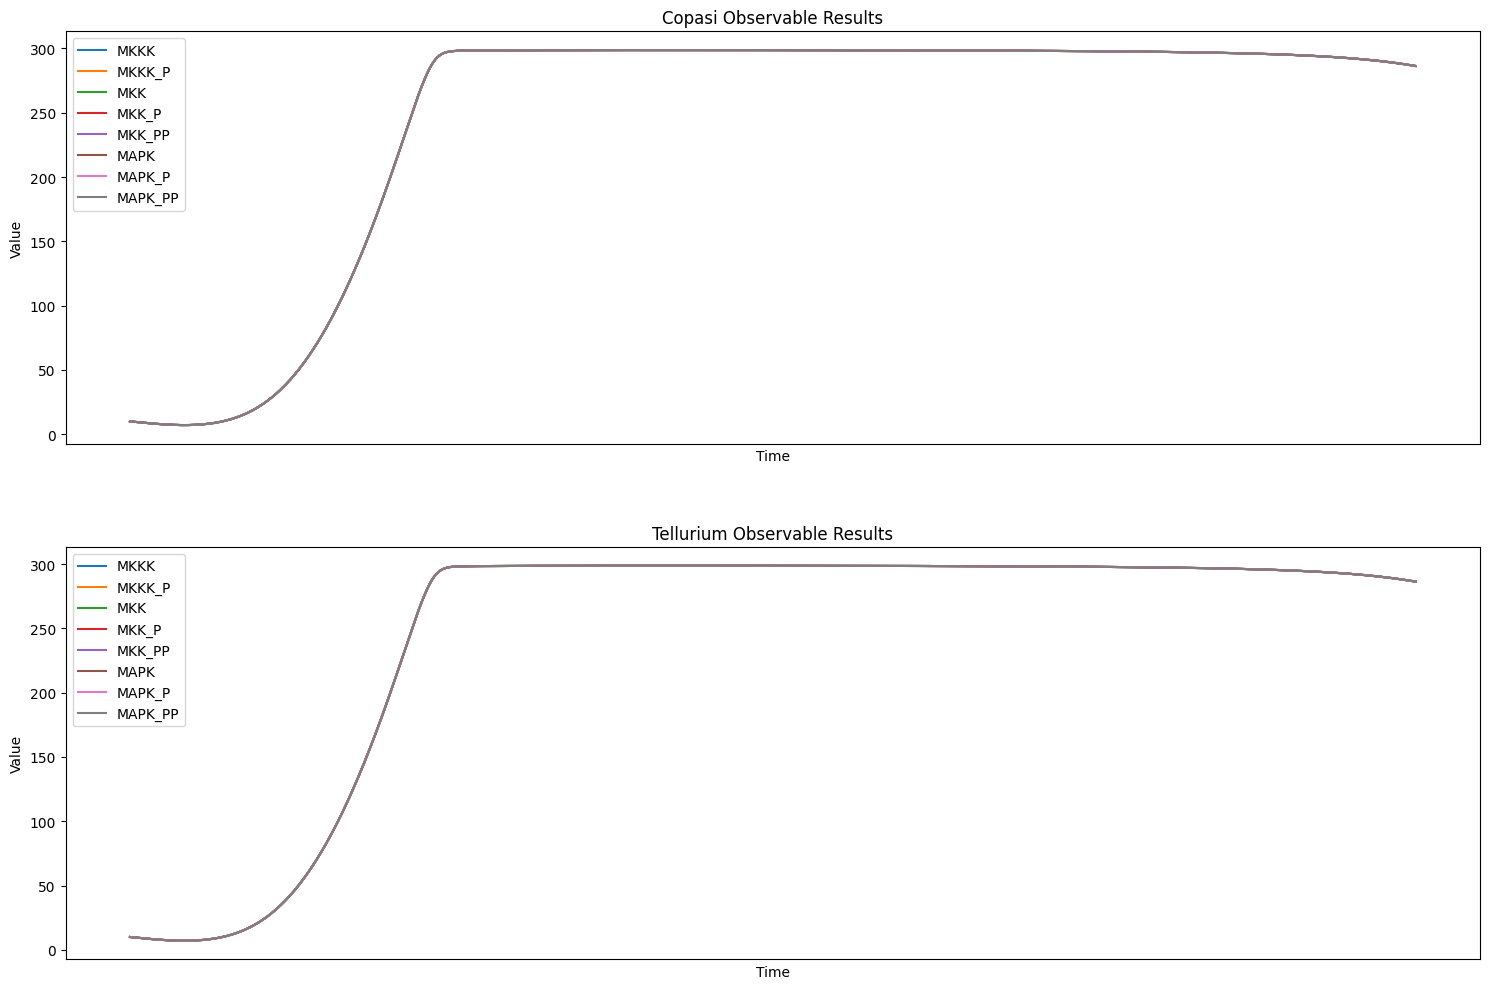

In [3]:
obs = verification1.get_output_observables()

In [10]:
sbml_verification = bc.verify(sbml_fp2, start, stop, steps)

Submitting verification...
> Status for job ending in c329: SUBMITTED:PENDING 
> Status for job ending in c329: COMPLETED 


In [16]:
sbml_verification['content']

{'job_id': 'verification-bio_check-request-623451b9-7660-4e5b-84f1-7d0d9d04b8e4-9f803f65-76e4-4416-8051-a872add6c329',
 'timestamp': '2024-09-23 16:34:44.192631',
 'status': 'COMPLETED',
 'results': {'LacI protein': {'mse': {'copasi': {'copasi': 0.0,
     'tellurium': 1513128.939462828},
    'tellurium': {'copasi': 1513128.939462828, 'tellurium': 0.0}},
   'proximity': {'copasi': {'copasi': True, 'tellurium': False},
    'tellurium': {'copasi': False, 'tellurium': True}},
   'output_data': {'copasi': [0.0,
     7.478514104085768,
     7.491003017153762,
     6.707503017578009,
     5.866265559021576,
     5.089915342643994,
     4.403643023186563,
     3.807945221159505,
     3.295815536406221,
     2.8581418299295365,
     2.4856728243015462,
     2.1697670720493862,
     1.9026578356552788,
     1.6775072622032996,
     1.4883699819717349,
     1.3301182846393185,
     1.1983546567784666,
     1.0893233961526407,
     0.9998276222647846,
     0.9271537081482569,
     0.86900411205343

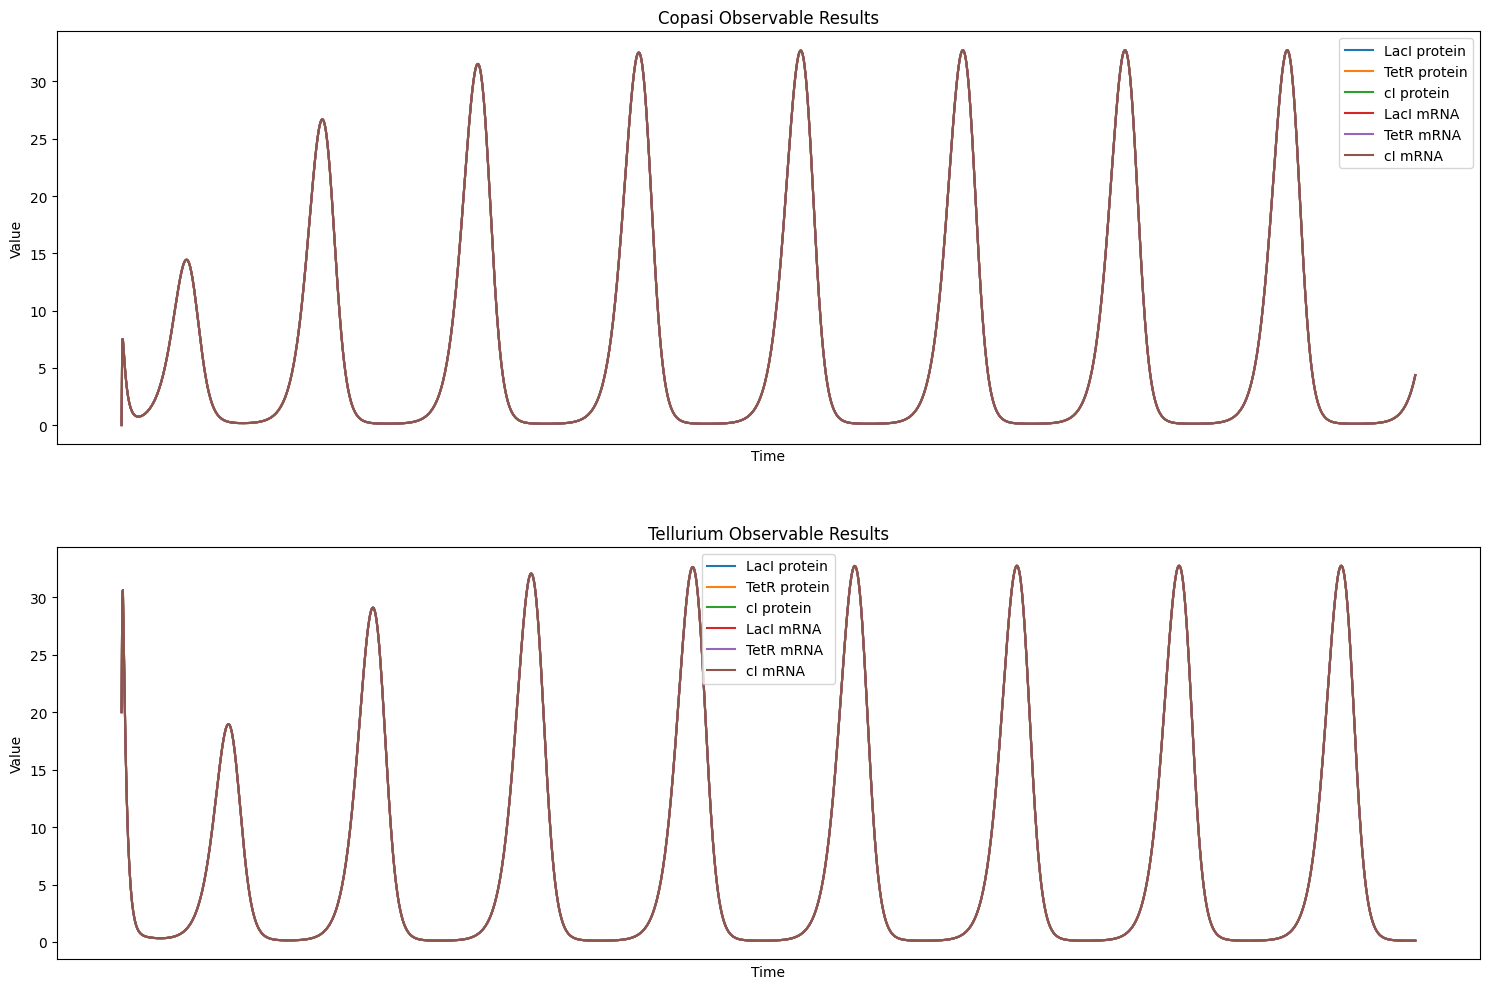

In [11]:
obs = sbml_verification.get_output_observables()

In [14]:
obs['LacI mRNA']['copasi'][:3], obs['cI mRNA']['copasi'][:3]

([0.0, 7.478514104085768, 7.491003017153762],
 [0.0, 7.478514104085768, 7.491003017153762])

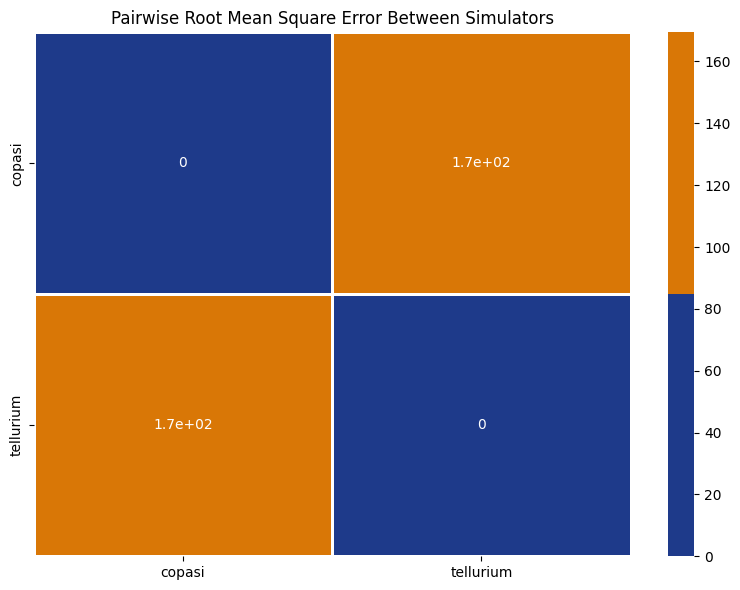

In [5]:
rmse = sbml_verification.get_rmse()

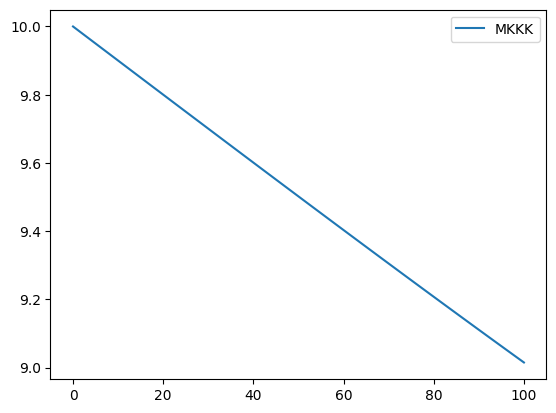

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt 


for obs_name, obs_outputs in obs.items():
    data = obs_outputs['copasi']
    if obs_name == "MKKK":
        sns.lineplot(data=data, label=obs_name)

plt.show()